In [16]:
import yfinance as yf
import pandas_datareader.data as web
import pandas as pd
import matplotlib.pyplot as plt

# Define parameters
ticker = 'AAPL'
start_date = '2020-01-01'
end_date = '2025-08-28'

In [29]:
# Fetch stock data
data = yf.download(ticker, start=start_date, end=end_date)

/tmp/ipython-input-3396578327.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


In [18]:
# Debug: Inspect initial structure
print("Initial data columns:", data.columns)
print("Initial data index levels:", data.index.nlevels)

Initial data columns: MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])
Initial data index levels: 1


In [19]:
# Flatten MultiIndex columns and reset index
data.columns = ['_'.join(col).strip() for col in data.columns.values]  # Flatten MultiIndex columns
data = data.reset_index()  # Move Date to column

In [20]:
# Fetch covariates
vix = web.DataReader('VIXCLS', 'fred', start=start_date, end=end_date)
fed_rate = web.DataReader('FEDFUNDS', 'fred', start=start_date, end=end_date)

In [21]:
# Debug: Inspect covariate structures
print("VIX columns:", vix.columns)
print("FEDFUNDS columns:", fed_rate.columns)
print("VIX index levels:", vix.index.nlevels)
print("FEDFUNDS index levels:", fed_rate.index.nlevels)

VIX columns: Index(['VIXCLS'], dtype='object')
FEDFUNDS columns: Index(['FEDFUNDS'], dtype='object')
VIX index levels: 1
FEDFUNDS index levels: 1


In [22]:
# Merge
data = data.merge(vix, left_on='Date', right_index=True, how='left').merge(
    fed_rate, left_on='Date', right_index=True, how='left').fillna(method='ffill')

/tmp/ipython-input-2382917584.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  fed_rate, left_on='Date', right_index=True, how='left').fillna(method='ffill')


In [23]:
data

,Date,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,VIXCLS,FEDFUNDS
0,2020-01-02,72.538506,72.598884,71.292296,71.545882,135480400,12.47,NaN
1,2020-01-03,71.833267,72.594032,71.608662,71.765644,146322800,14.02,NaN
2,2020-01-06,72.405663,72.444306,70.702997,70.954173,118387200,13.85,NaN
3,2020-01-07,72.065147,72.671341,71.845369,72.415337,108872000,13.79,NaN
4,2020-01-08,73.224419,73.526310,71.768094,71.768094,132079200,13.45,NaN
...,...,...,...,...,...,...,...,...
1416,2025-08-21,224.899994,226.520004,223.779999,226.270004,30621200,16.60,4.33
1417,2025-08-22,227.759995,229.089996,225.410004,226.169998,42477800,14.22,4.33
1418,2025-08-25,227.160004,229.300003,226.229996,226.479996,30983100,14.79,4.33
1419,2025-08-26,229.309998,229.490005,224.690002,226.869995,54575100,14.62,4.33


In [24]:
data.head()

,Date,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,VIXCLS,FEDFUNDS
0,2020-01-02,72.538506,72.598884,71.292296,71.545882,135480400,12.47,NaN
1,2020-01-03,71.833267,72.594032,71.608662,71.765644,146322800,14.02,NaN
2,2020-01-06,72.405663,72.444306,70.702997,70.954173,118387200,13.85,NaN
3,2020-01-07,72.065147,72.671341,71.845369,72.415337,108872000,13.79,NaN
4,2020-01-08,73.224419,73.526310,71.768094,71.768094,132079200,13.45,NaN


In [25]:
# Set 'Date' as index again
data.set_index('Date', inplace=True)

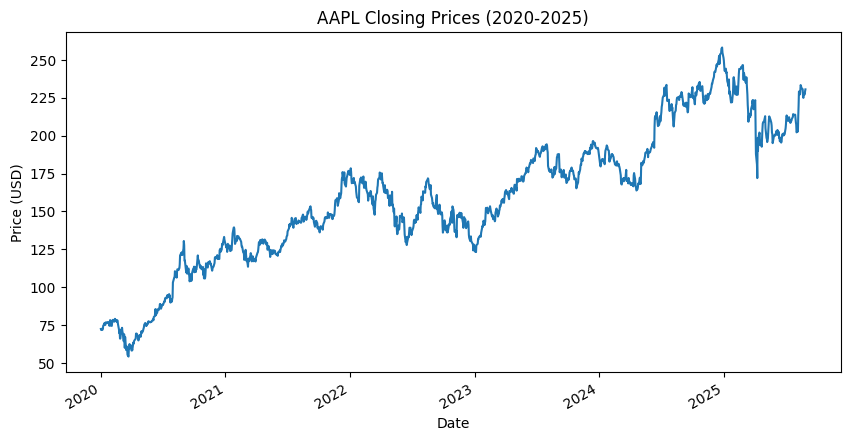

In [27]:
# Visualize
plt.figure(figsize=(10, 5))
data['Close_AAPL'].plot(title=f'{ticker} Closing Prices (2020-2025)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()  # Display plot; you'll save manually

In [28]:
# Documentation
print(f"Data Shape: {data.shape}")
display(data.head())

Data Shape: (1421, 7)


,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,VIXCLS,FEDFUNDS
Date,,,,,,,
2020-01-02,72.538506,72.598884,71.292296,71.545882,135480400,12.47,NaN
2020-01-03,71.833267,72.594032,71.608662,71.765644,146322800,14.02,NaN
2020-01-06,72.405663,72.444306,70.702997,70.954173,118387200,13.85,NaN
2020-01-07,72.065147,72.671341,71.845369,72.415337,108872000,13.79,NaN
2020-01-08,73.224419,73.526310,71.768094,71.768094,132079200,13.45,NaN


In [30]:
data.to_csv('raw_AAPL.csv')